### 2. Use the data.csv dataset as provided in the notebook as pandas DataFrame and process it as questioned below.

In [55]:
import pandas as pd
import numpy as np
import numpy as np
from nltk.corpus import stopwords 
from gensim.parsing.preprocessing import PorterStemmer, remove_stopwords
import string 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from unidecode import unidecode
import re

In [59]:
df = pd.read_csv("D:\\PES_MTech\\Sem-2\\NLP\\ESA_Samples\\data.csv")
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

### 2.a) Pre-process the ‘Text’ feature as questioned below.  
#### Remove the accented characters from the text feature. (3 marks)
#### Remove digits from the text feature. (3 marks)
#### Remove punctuations from the text feature. (3 marks)
#### Remove stopwords from the text feature. (3 marks)
#### Eliminate multiple spaces from the text feature. (3 marks)
#### Note: Save this pre-processed text feature and use it as a feature for the next questions.


In [61]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [63]:
## Remove the accented characters from the text feature.
# Function to remove accented characters

def remove_accents(text):
    return unidecode(text)

# Apply the function
df['text'] = df['text'].apply(remove_accents)

# Display result
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [65]:
# Remove digits from the text feature.
# Function to remove digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_digits)

# View cleaned DataFrame
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [67]:
# Remove punctuations from the text feature.
def remove_punctuations(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['text'] = df['text'].apply(remove_punctuations)

In [69]:
### Remove stopwords from the text feature. 
stop=set(stopwords.words('english'))

def remove_stopwords(text):
    word = text.split()
    word = [w for w in word if w not in stop and len(w)>1]
    return ''.join(word)

df['text'] = df['text'].apply(remove_stopwords)
df['text'].head()

0                        VirginAmericaWhatdhepburnsaid
1    VirginAmericaplusyouveaddedcommercialsexperien...
2    VirginAmericadidnttodayMustmeanneedtakeanother...
3    VirginAmericareallyaggressiveblastobnoxiousent...
4                       VirginAmericareallybigbadthing
Name: text, dtype: object

In [71]:
# Eliminate multiple spaces from the text feature.
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_extra_spaces)

# View result
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

### 2.b) Find out the 5 most frequent words in the text corpus (from the preprocessed output of the previous question 2. a)

In [73]:
from collections import Counter

# Combine all text into one string
all_text = ' '.join(df['text'])

# Split into words
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Get top 6 most common words
top_six = word_counts.most_common(6)

# Display result
print(top_six)

[('unitedthank', 14), ('AmericanAirthanks', 12), ('unitedthanks', 11), ('SouthwestAirthank', 9), ('JetBluethanks', 9), ('USAirwaysthanks', 9)]


### 2.c) Vectorize the pre-processed text feature by building/training a Skip-Gram Word2Vec model. Use this Skip-Gram Word2Vec model to fetch the top 5 most similar words for the word 'food'. (marks 3+5)

In [75]:
from gensim.models import Word2Vec
# Tokenize the cleaned text into words
sentences = df['text'].apply(lambda x: x.split()).tolist()

# Train a Word2Vec model using Skip-Gram architecture
w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=1, workers=4)

# Fetch and display top 5 similar words to 'food'
if 'food' in w2v_model.wv:
    similar_words = w2v_model.wv.most_similar('food', topn=5)
    print("Top 5 similar words to 'food':")
    for word, score in similar_words:
        print(f"{word} ({score:.4f})")
else:
    print("The word 'food' is not in the vocabulary.")

The word 'food' is not in the vocabulary.


### 2.d) Vectorize the pre-processed text feature by building a CBOW Word2Vec model. Use the trained CBOW Word2Vec model to fetch the top 5 most similar words for the word 'food'. Is the output different from previous Skip-Gram’s output? (marks 3+5+1)

In [77]:
# Tokenize sentences
sentences = df['text'].apply(lambda x: x.split()).tolist()

# Train CBOW model (sg=0)
cbow_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Get top 5 most similar words to 'food'
if 'food' in cbow_model.wv:
    similar_words = cbow_model.wv.most_similar('food', topn=5)
    print("Top 5 similar words to 'food' using CBOW:")
    for word, score in similar_words:
        print(f"{word} ({score:.4f})")
else:
    print("The word 'food' is not in the CBOW vocabulary.")

The word 'food' is not in the CBOW vocabulary.


### 3.a) Convert Textual output ( of question 2. a) into numerical using countvectorizer  

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with given parameters
count_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))

# Fit and transform the 'text' column into a numerical feature matrix
X_counts = count_vectorizer.fit_transform(df['text'])

# X_counts is a sparse matrix representing the count vectors
print(f"Shape of count vectorized data: {X_counts.shape}")

# Optional: To see the feature names (words)
print("Some feature names:", count_vectorizer.get_feature_names_out()[:10])

Shape of count vectorized data: (14640, 14303)
Some feature names: ['albertbreerknowcomplainrtusairwaysreminderfromwelltweetingamericanair'
 'allfollowerspleasenoteusairwaystakingcustomerservicecallsrespondinghelpingviasocmediadontflyusairways'
 'alrightjetbluedonealternativelyyoudlikecharterprivatejetpittgladlyaccept'
 'alrightsomeonestoprtjetblueourfleetsfleekhttptcolchvjolidg'
 'alwaysjetbluefanmaybenexttimeillflyvirginamericarealcustomerservice'
 'alwayslookforwardjbrtjetbluebostongardenlookingforwardwelcomingonboard'
 'alwaystogetheryourewelcomertvirginamericajessicajaymesyourewelcome'
 'americanair'
 'americanairaaagentsaidrepeatedexplainingtoldunderstandenglishhisreplyourconversation'
 'americanairaaairplanesittinghrstheremechanicalproblemsbtwtheaadeskunorganized']


### 3.b) Convert Textual output ( of question 2. a) into numerical using  TfidfVectorizer 

In [81]:
# Initialize TfidfVectorizer with given parameters
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 1))

# Fit and transform the 'text' column into TF-IDF feature matrix
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# X_tfidf is a sparse matrix representing the TF-IDF vectors
print(f"Shape of TF-IDF vectorized data: {X_tfidf.shape}")

# Optional: To see some feature names (words)
print("Some TF-IDF feature names:", tfidf_vectorizer.get_feature_names_out()[:10])

Shape of TF-IDF vectorized data: (14640, 14303)
Some TF-IDF feature names: ['albertbreerknowcomplainrtusairwaysreminderfromwelltweetingamericanair'
 'allfollowerspleasenoteusairwaystakingcustomerservicecallsrespondinghelpingviasocmediadontflyusairways'
 'alrightjetbluedonealternativelyyoudlikecharterprivatejetpittgladlyaccept'
 'alrightsomeonestoprtjetblueourfleetsfleekhttptcolchvjolidg'
 'alwaysjetbluefanmaybenexttimeillflyvirginamericarealcustomerservice'
 'alwayslookforwardjbrtjetbluebostongardenlookingforwardwelcomingonboard'
 'alwaystogetheryourewelcomertvirginamericajessicajaymesyourewelcome'
 'americanair'
 'americanairaaagentsaidrepeatedexplainingtoldunderstandenglishhisreplyourconversation'
 'americanairaaairplanesittinghrstheremechanicalproblemsbtwtheaadeskunorganized']


### 3.c) Build LSTM multiclass text classification model on the cleaned dataset (output of question 2. a) using Keras libraries. 

In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Pad sequences
max_len = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(df['text'])
y = to_categorical(y_encoded)

In [95]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["text"])
X = tokenizer.texts_to_sequences(df["text"])
X = pad_sequences(X, padding="post")
vocab_size = len(tokenizer.word_index) + 1
max_len = X.shape[1]

# Step 5: Encode labels
le = LabelEncoder()
y = le.fit_transform(df["airline_sentiment"])
y = to_categorical(y)

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build improved model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(y.shape[1], activation="softmax")
])

# Build model explicitly to show summary correctly
model.build(input_shape=(None, max_len))
model.summary()

# Step 8: Compile and train
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=16,
    callbacks=[early_stop]
)

C:\Users\Yerriswamy\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 1, 64)          │       915,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,731 (3.76 MB)

 Trainable params: 985,731 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6224 - loss: 0.9462 - val_accuracy: 0.6513 - val_loss: 0.8898
Epoch 2/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8076 - loss: 0.3804 - val_accuracy: 0.4655 - val_loss: 1.3538
Epoch 3/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9742 - loss: 0.0786 - val_accuracy: 0.2579 - val_loss: 2.8114
Epoch 4/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9962 - loss: 0.0155 - val_accuracy: 0.2640 - val_loss: 2.4409


### 3.d) show the confusion matrix and compute accuracy from the model and interpret it. 

In [97]:
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert one-hot encoded predictions & true labels back to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   


Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

    negative       0.65      1.00      0.79      1889
     neutral       0.00      0.00      0.00       580
    positive       0.90      0.04      0.08       459

    accuracy                           0.65      2928
   macro avg       0.52      0.35      0.29      2928
weighted avg       0.56      0.65      0.52      2928



C:\Users\Yerriswamy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yerriswamy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yerriswamy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


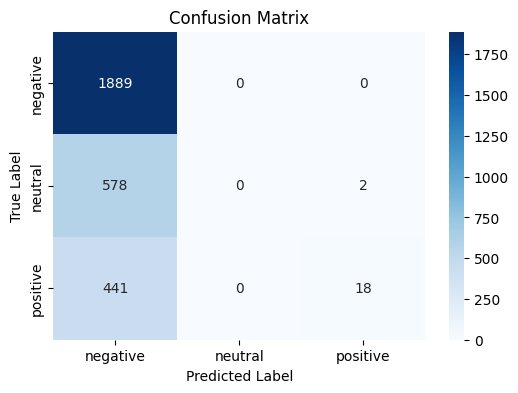

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {acc:.2f}")
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
